# Salary Prediction using ml models

# Salary Prediction using linear Regression

## importing required libraries


In [35]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")




In [36]:
data = pd.read_csv('Salary.csv')
data.shape

(35, 2)

In [37]:
data.head

<bound method NDFrame.head of     YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872
30             11.2  127345
31             11.5  126756
32             12.3  128765
33             12.

# Check null value is present or not in dataset 

In [38]:
data.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [39]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


In [41]:
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


# Prepare data

In [42]:
X = data.drop('Salary',axis=1)
y = data['Salary']

In [43]:
X.shape , y.shape

((35, 1), (35,))

# dataset visual

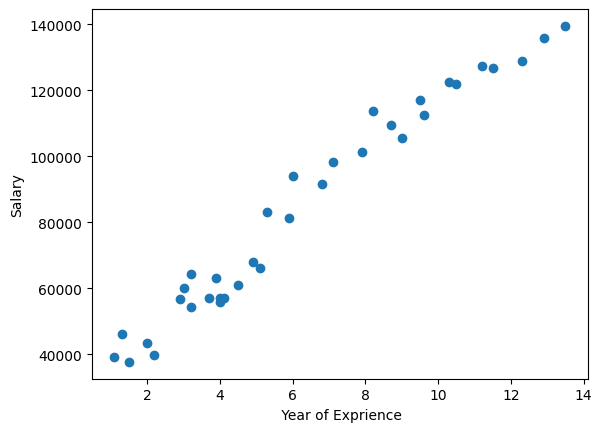

In [44]:
plt.scatter( data['YearsExperience'] ,data['Salary'] )
plt.xlabel(' Year of Exprience')
plt.ylabel('Salary')
plt.show()

# Split data into train and test

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [46]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((24, 1), (11, 1), (24,), (11,))

# Define LinearRegression Model

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
y_test

18     81363
7      54445
20     91738
34    139465
30    127345
26    116969
25    105582
27    112635
32    128765
2      37731
28    122391
Name: Salary, dtype: int64

In [49]:
pred = lr.predict(X_test)
pred

array([ 80885.0981995 ,  56748.8141313 ,  88930.52622223, 148824.26816923,
       128263.72988891, 113066.81029042, 108597.12805557, 113960.74673739,
       138097.03080559,  41551.89453281, 120218.30186618])

## Accuracy of linear Regression

In [50]:
lr.score(X_test , y_test)

0.9775754814071884

# Check Actual data , Predicted data and difference between the Actual and Predicted data

In [51]:
diff = y_test - pred

In [52]:
pd.DataFrame(np.c_[y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,81363.0,80885.098199,477.901801
1,54445.0,56748.814131,-2303.814131
2,91738.0,88930.526222,2807.473778
3,139465.0,148824.268169,-9359.268169
4,127345.0,128263.729889,-918.729889
5,116969.0,113066.810290,3902.189710
6,105582.0,108597.128056,-3015.128056
7,112635.0,113960.746737,-1325.746737
8,128765.0,138097.030806,-9332.030806
9,37731.0,41551.894533,-3820.894533


# Visualize Model, that how it is performing on training data

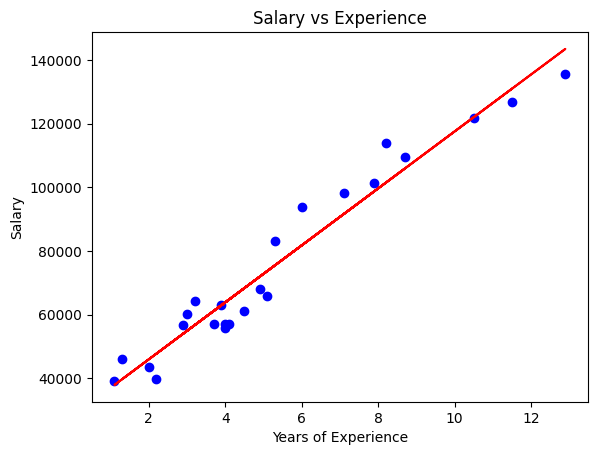

In [53]:
plt.scatter(X_train , y_train , color='blue')
plt.plot(X_train ,lr.predict(X_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

# Visualize Model, that how it is performing on testing data

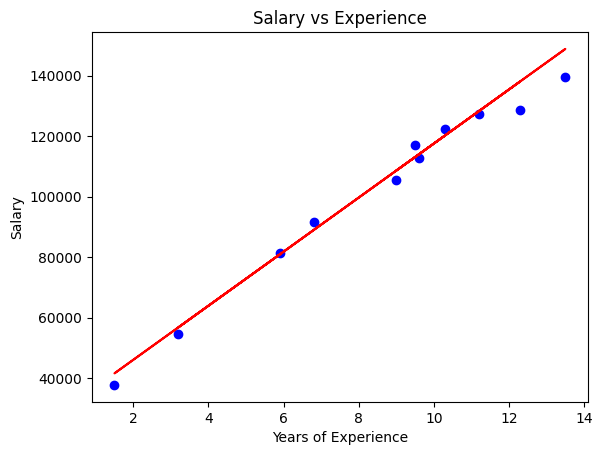

In [54]:
plt.scatter(X_test , y_test,color='blue')
plt.plot(X_test ,lr.predict(X_test) ,color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

In [55]:
RSM = np.sqrt(mean_squared_error(y_test,pred))

In [56]:
RSM

4615.587830861726

In [57]:
R2 = r2_score(y_test,pred)
R2

0.9775754814071884

In [58]:
MAE = mean_absolute_error(y_test,pred)
MAE

3585.079612952305

# Test on the custom data


In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
data1 = pd.read_csv('Salary.csv')
data1.shape

(35, 2)

In [61]:
a = data.drop('Salary',axis=1)
b = data['Salary']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.4, random_state=101)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((21, 1), (14, 1), (21,), (14,))

In [63]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [64]:
pred = model.predict(X_test)
pred

array([ 83088. ,  64445. ,  98273. , 135675. , 126756. , 109431. ,
       109431. , 121872. , 135675. ,  46205. , 121872. ,  83088. ,
        67938. ,  56375.5])

In [65]:
diff = y_test - pred

In [66]:
pd.DataFrame(np.c_[y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,81363.0,83088.0,-1725.0
1,54445.0,64445.0,-10000.0
2,91738.0,98273.0,-6535.0
3,139465.0,135675.0,3790.0
4,127345.0,126756.0,589.0
5,116969.0,109431.0,7538.0
6,105582.0,109431.0,-3849.0
7,112635.0,121872.0,-9237.0
8,128765.0,135675.0,-6910.0
9,37731.0,46205.0,-8474.0


In [67]:
predictions = model.predict(X_test)

In [68]:
score = model.score(X_test, y_test)
print("Model accuracy:", score)

Model accuracy: 0.9526331277230081


In [69]:

exp =float(input("Enter year of experience"))
model.predict([[exp]])[0]
print(f"Salary of {exp} year experience employee = {int(model.predict([[exp]])[0])} Rupees")

ValueError: could not convert string to float: ''

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load dataset
data2 = pd.read_csv('Salary.csv')

# Split dataset into features and target variable
X = data2.drop('Salary',axis=1)
y = data2['Salary']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Create random forest regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = rf.score(X_test, y_test)
accuracy = model.score(X_test, y_test)

# Print evaluation metrics
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)
print('R-squared:', r2_score)
print("Accuracy",accuracy)
exp =float(input("Enter year of experience"))
rf.predict([[exp]])[0]
print(f"Salary of {exp} year experience employee = {int(rf.predict([[exp]])[0])} Rupees")


Mean squared error: 39810481.80910315
Root mean squared error: 6309.554802765656
R-squared: 0.9563933782075765
Accuracy 0.9526331277230081
Enter year of experience4
Salary of 4.0 year experience employee = 56431 Rupees
